# Generate Simulated Data: Random-Plaintext-Dataset-3

In [2]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [3]:
# Define lengh for the data set
data_leng = 100000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldMaskedLekage = 24
fieldMasked = 4

#Random Plaintext
FixedPlaintext = False

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = False

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -5
    jitterRight = 5
else:
    jitterLeft = None
    jitterRight = None

# If masked used True 
maskedValue = True

In [4]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [5]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,100000,50,23,0.0,5.0,None,None


In [6]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [7]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
mask = []
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))
    
    mask.append(random.randint(0,255))

print("plaintext:",plaintext[0:5],'\nmask',mask[0:5])

plaintext: [97, 33, 10, 108, 10] 
mask [220, 43, 174, 208, 255]


In [8]:
# Verify size of plaintext
len(plaintext)

100000

In [9]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [12.286405485391802, 4.393033395831209, -0.0800269458941516, 0.7175005739696227, 7.921371966592579] 
labels: [3, 2, 3, 2, 3]


In [10]:
# Verify size of leakedData 
len(leakedData)

100000

In [11]:
# Verify size of labels 
len(labels)

100000

In [12]:
maskedData = []
maskedNoise = []
maskIndex = 0
for d in plaintext:
    maskedData.append((bin(((AES_Sbox[d^key])^mask[maskIndex])).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise.append((bin(mask[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskIndex = maskIndex + 1
print("maskedData:",maskedData[0:5],"\nmaskedNoise:",maskedNoise[0:5])

maskedData: [1.2788895223885222, 6.252159938987595, -4.311314938781529, 5.3796760926570695, 7.83472205631997] 
maskedNoise: [6.820957431899819, -5.563901457581743, 8.3106841271707, 8.05863825968454, 14.206348185697884]


In [13]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace sample at 5th position with the mask and added noise 
        if z == fieldMasked:
            rawData.append(maskedNoise[i])
            
        # Replace sample at 25th position with HW( sbox( plaintext xor key ) xor mask) + noise    
        elif z == fieldMaskedLekage:
            rawData.append(maskedData[i])
            
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart, noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  [0.6890660893030018, 2.6864689243979285, 10.960842094402565, 4.4909618385642025, 6.820957431899819, -0.7806573559239922, 11.357880316715196, 6.018105188683096, -6.872997704935799, 8.177442553667316, 7.899065889598684, -3.088254454483022, 7.294862629582974, 8.268972939688172, 0.5729226619055989, -4.664867053789859, 4.571303816371774, 3.8631588402354424, 12.26422216674035, 9.271117957601593, -0.20569200038140956, 12.53796978240857, 8.077618647154608, 4.893633171071988, 1.2788895223885222, 13.977690573705924, -0.07334297016615565, 10.017557093307841, 2.2518945207172916, 8.625168179229924, 3.7479358535565, 6.169902633392559, -4.543483315330795, -2.2077190294298945, -5.160481255094263, 1.3523535752981215, -5.393946467740635, 4.097723917057567, 7.540062857701524, 3.281504155872832, 1.9610443122913823, -4.208101472257434, -1.88259496656097, 7.336870983898747, 11.854455107384169, -2.584816138256503, 10.880875331827202, -0.7002612556125785, 5.762694727929983, 3.35851173

In [14]:
# Verify size of leakedData 
len(rawTraces)

100000

## Plot Simulated Data

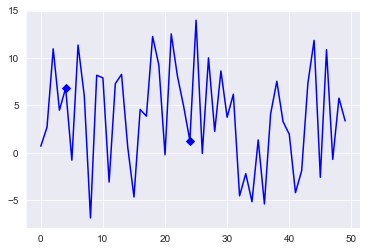

In [15]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[fieldMaskedLekage,fieldMasked])

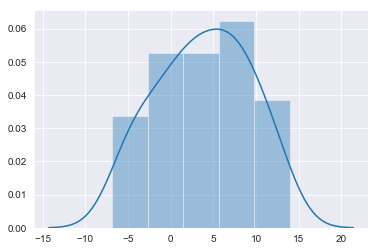

In [16]:
sns.distplot(rawTraces[0])

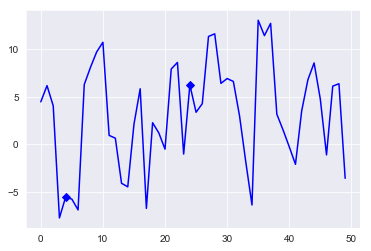

In [17]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldMaskedLekage,fieldMasked])

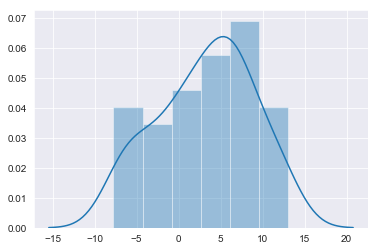

In [18]:
sns.distplot(rawTraces[1])

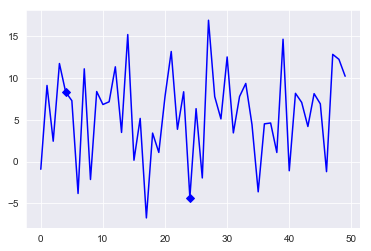

In [19]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldMaskedLekage,fieldMasked])

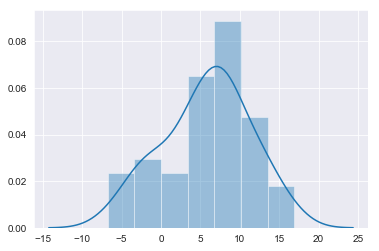

In [20]:
sns.distplot(rawTraces[2])

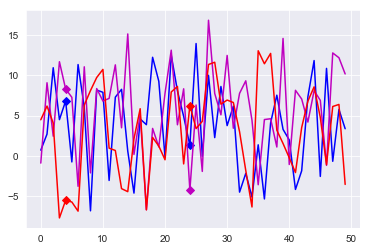

In [21]:
plt.plot(rawTraces[0],'-bD',rawTraces[2],'-mD',rawTraces[1],'-rD',markevery=[fieldMaskedLekage,fieldMasked])

### Data Path

In [22]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [23]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, False) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, False)
    def test_Mask(self):
        self.assertEqual(maskedValue, True)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'RandomPlaintext')
    
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Mask (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.032s

OK


In [24]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,0.689066,2.686469,10.960842,4.490962,6.820957,-0.780657,11.357880,6.018105,-6.872998,8.177443,...,-4.208101,-1.882595,7.336871,11.854455,-2.584816,10.880875,-0.700261,5.762695,3.358512,97
1,4.474020,6.186110,4.061514,-7.759358,-5.563901,-5.776760,-6.914786,6.308300,8.114839,9.742339,...,-2.106871,3.508765,6.800701,8.576799,4.763817,-1.114916,6.128697,6.385421,-3.584260,33
2,-0.925151,9.088410,2.429275,11.710718,8.310684,7.272798,-3.818171,11.076571,-2.146650,8.364866,...,8.148574,7.062849,4.187293,8.109441,6.894432,-1.208615,12.803580,12.208664,10.189583,10
3,2.678084,-0.140398,5.673182,12.184649,8.058638,3.447081,3.608345,3.129017,13.654312,5.939712,...,14.318445,0.214688,1.797275,5.971165,5.979379,6.759454,8.033135,8.144493,-5.102873,108
4,2.939101,1.630867,4.790259,7.333049,14.206348,5.639262,12.724278,-2.016353,-3.821054,2.772211,...,10.319774,14.441196,2.824801,2.932244,-1.996953,12.015719,-2.144371,-2.342122,8.869850,10


### Write Data 

In [25]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS3.csv',index=False)